<a href="https://colab.research.google.com/github/YoussefAbdelnasser11/face-Mask-Detection-using-CNN/blob/main/Face_Mask_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


importing face mask dataset

In [3]:
#API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 95% 155M/163M [00:01<00:00, 155MB/s]
100% 163M/163M [00:01<00:00, 142MB/s]


In [4]:
# extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


Importing the Dependecies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2275.jpg', 'with_mask_1446.jpg', 'with_mask_658.jpg', 'with_mask_1323.jpg', 'with_mask_3347.jpg']
['with_mask_2603.jpg', 'with_mask_378.jpg', 'with_mask_1766.jpg', 'with_mask_2829.jpg', 'with_mask_2223.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2513.jpg', 'without_mask_2209.jpg', 'without_mask_2228.jpg', 'without_mask_3696.jpg', 'without_mask_3145.jpg']
['without_mask_3114.jpg', 'without_mask_3674.jpg', 'without_mask_1752.jpg', 'without_mask_2080.jpg', 'without_mask_1376.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**creating labels for the two class of Images**

with mask --> 1

without mask -->0

In [10]:
#create the Labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

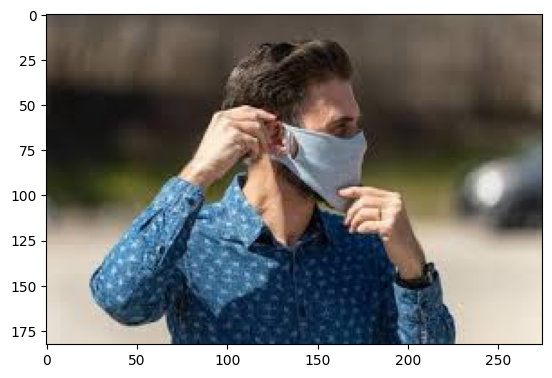

In [14]:
# displaying with mask images
img = mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')
imgplot = plt.imshow(img)
plt.show()

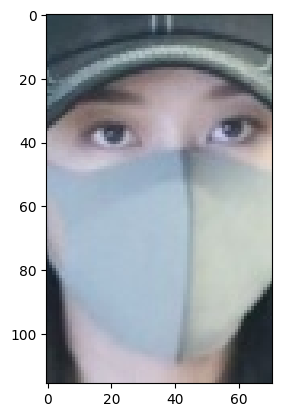

In [15]:
img = mpimg.imread('/content/data/with_mask/with_mask_378.jpg')
imgplot = plt.imshow(img)
plt.show()

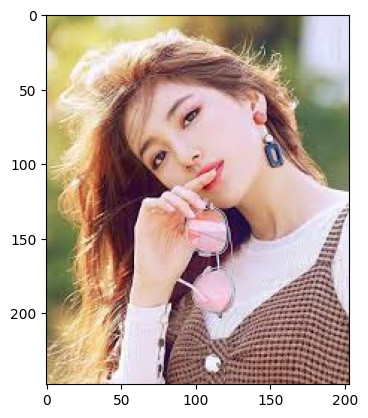

In [16]:
# displaying without mask images
img = mpimg.imread('/content/data/without_mask/without_mask_3114.jpg')
imgplot = plt.imshow(img)
plt.show()

Image processing

1.Resize the Images

2.Convert the images to numby arrays

In [17]:
# resize and convert images to numby arrays +

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
len(data)

7553

In [19]:
type(data)

list

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[250, 255, 255],
        [254, 255, 252],
        [255, 255, 247],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 255, 255],
        [255, 255, 254],
        [255, 255, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
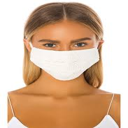

In [20]:
data[0]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
# converting image list and label list to numby arrays

X = np.array(data)
Y = np.array(labels)

In [24]:
type(X)

numpy.ndarray

In [25]:
type(Y)

numpy.ndarray

In [26]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [30]:
#scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255


array([[[ 23,  27,  36],
        [ 20,  24,  33],
        [ 16,  20,  31],
        ...,
        [ 43,  43,  53],
        [ 34,  34,  44],
        [ 37,  35,  46]],

       [[ 35,  39,  48],
        [ 27,  31,  40],
        [ 22,  26,  37],
        ...,
        [ 52,  52,  62],
        [ 42,  42,  52],
        [ 41,  39,  50]],

       [[ 27,  31,  40],
        [ 24,  28,  37],
        [ 26,  31,  39],
        ...,
        [ 52,  52,  62],
        [ 44,  44,  54],
        [ 39,  39,  49]],

       ...,

       [[230, 242, 254],
        [230, 242, 254],
        [229, 241, 253],
        ...,
        [240, 255, 250],
        [239, 255, 250],
        [239, 255, 250]],

       [[229, 241, 253],
        [229, 241, 253],
        [229, 241, 253],
        ...,
        [238, 255, 249],
        [240, 255, 251],
        [239, 255, 250]],

       [[227, 241, 252],
        [227, 241, 252],
        [228, 240, 252],
        ...,
        [239, 255, 250],
        [239, 255, 250],
        [239, 255, 250]]], dtype=uint8)
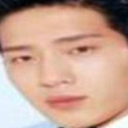

In [31]:
X_train[1]

In [32]:
X_train_scaled[1]

array([[[0.09019608, 0.10588235, 0.14117647],
        [0.07843137, 0.09411765, 0.12941176],
        [0.0627451 , 0.07843137, 0.12156863],
        ...,
        [0.16862745, 0.16862745, 0.20784314],
        [0.13333333, 0.13333333, 0.17254902],
        [0.14509804, 0.1372549 , 0.18039216]],

       [[0.1372549 , 0.15294118, 0.18823529],
        [0.10588235, 0.12156863, 0.15686275],
        [0.08627451, 0.10196078, 0.14509804],
        ...,
        [0.20392157, 0.20392157, 0.24313725],
        [0.16470588, 0.16470588, 0.20392157],
        [0.16078431, 0.15294118, 0.19607843]],

       [[0.10588235, 0.12156863, 0.15686275],
        [0.09411765, 0.10980392, 0.14509804],
        [0.10196078, 0.12156863, 0.15294118],
        ...,
        [0.20392157, 0.20392157, 0.24313725],
        [0.17254902, 0.17254902, 0.21176471],
        [0.15294118, 0.15294118, 0.19215686]],

       ...,

       [[0.90196078, 0.94901961, 0.99607843],
        [0.90196078, 0.94901961, 0.99607843],
        [0.89803922, 0

**Building a convolutional neural networks(CNN)**

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 151s 877ms/step - accuracy: 0.6597 - loss: 0.7957 - val_accuracy: 0.8975 - val_loss: 0.2905
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 194s 831ms/step - accuracy: 0.8978 - loss: 0.2800 - val_accuracy: 0.9008 - val_loss: 0.2898
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 143s 842ms/step - accuracy: 0.9026 - loss: 0.2562 - val_accuracy: 0.9091 - val_loss: 0.2682
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 200s 834ms/step - accuracy: 0.9319 - loss: 0.1897 - val_accuracy: 0.8893 - val_loss: 0.3214
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 146s 860ms/step - accuracy: 0.9414 - loss: 0.1587 - val_accuracy: 0.9207 - val_loss: 0.3106


Model **Evaluation**

In [37]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy=', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 244ms/step - accuracy: 0.9020 - loss: 0.2868
Test Accuracy= 0.9139642715454102


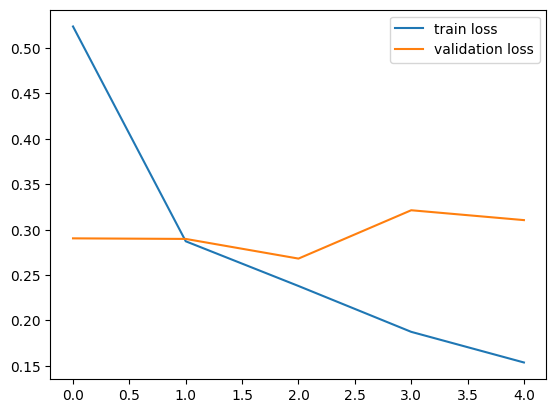

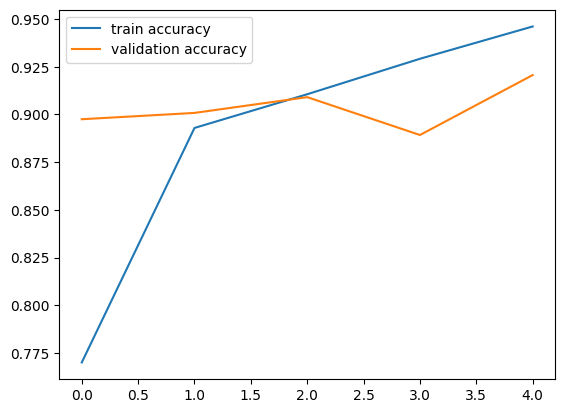

In [38]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label=['train loss'])
plt.plot(h.history['val_loss'], label=['validation loss'])
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['accuracy'], label=['train accuracy'])
plt.plot(h.history['val_accuracy'], label=['validation accuracy'])
plt.legend()
plt.show()

Predictive **System**

Path of the image to be predicted: /content/test1.jpg


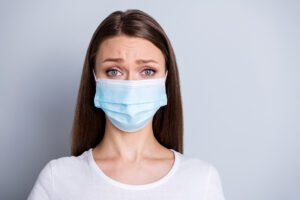

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[0.21155071 0.8547565 ]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')